Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 512, 64)        204864    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2, 512, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 512, 64)        102464    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 512, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 512, 64)        102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 512, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 256, 64)        3

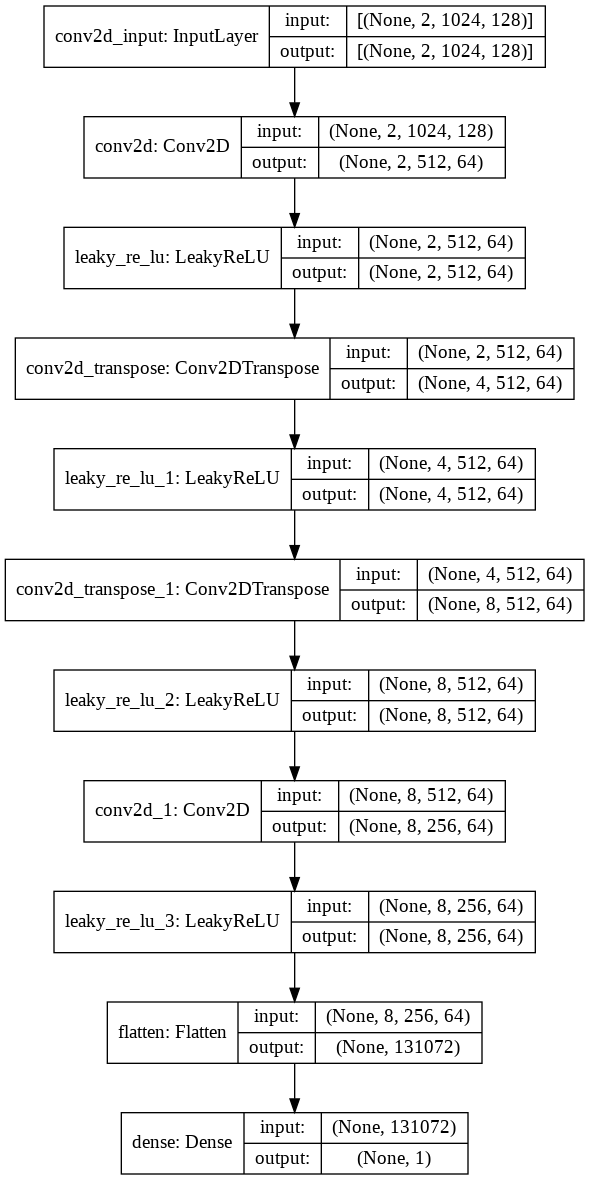

In [1]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv3D
from keras.layers import Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(2,1024,128)):
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(1, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3,3), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def define_discriminator2(in_shape=(2,1024,128)):
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(1, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define model
model = define_discriminator2()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16384)             1654784   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 32, 4)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 64, 64)       6464      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 64, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)       

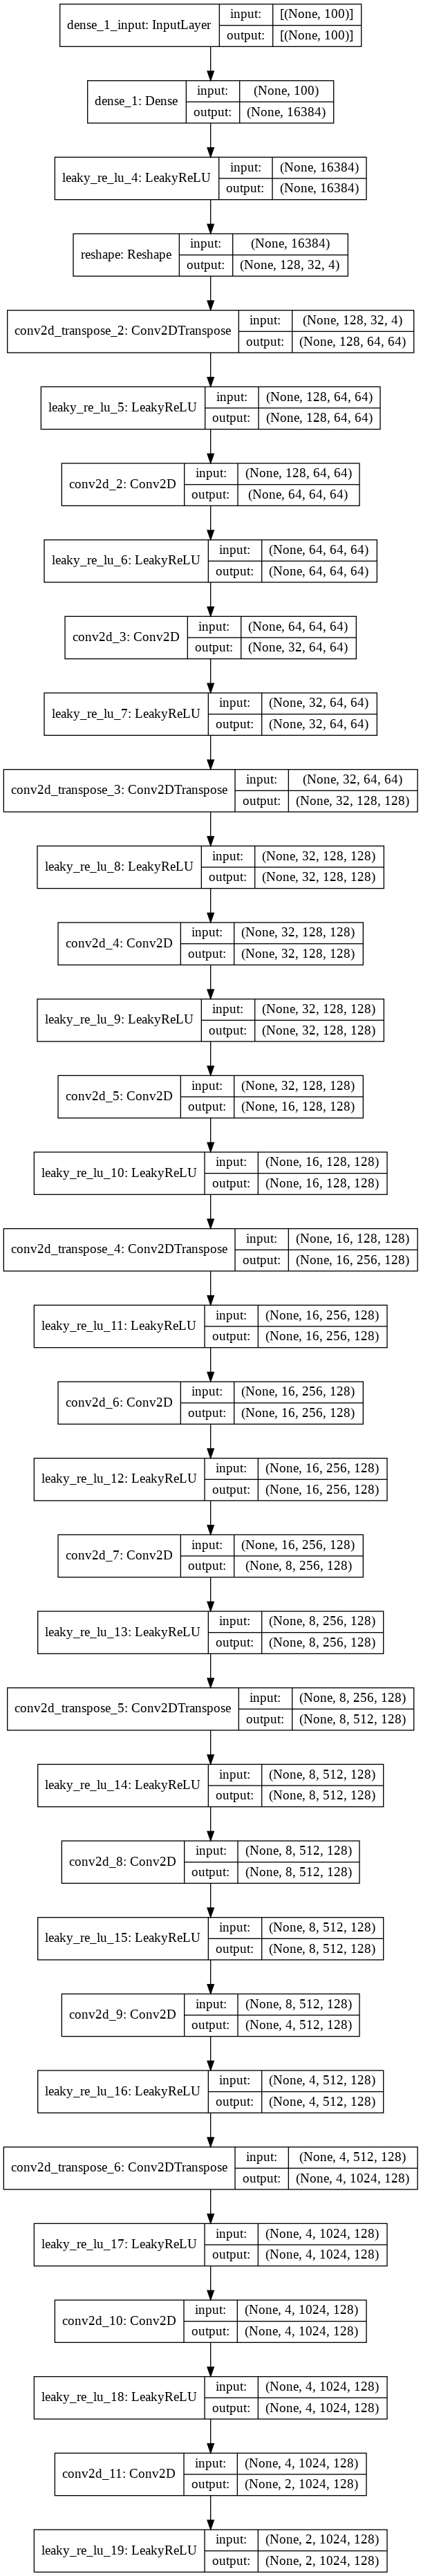

In [2]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Conv3DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 128 * 32 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((128, 32, 4)))

  model.add(Conv2DTranspose(64, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(64, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(64, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (5,5), strides=(2,1), activation='sigmoid', padding='same'))
  model.add(LeakyReLU(alpha=0.2))
#   # upsample to 14x14
#   model.add(Conv3DTranspose(64, (5,5,5), strides=(2,2,2), padding='same'))
#   model.add(LeakyReLU(alpha=0.2))
#   # upsample to 28x28
#   model.add(Conv3DTranspose(64, (2,2,2), strides=(2,2,2), padding='same'))
#   model.add(LeakyReLU(alpha=0.2))
#   model.add(Conv3DTranspose(128, (2,2,2), strides=(2,2,2), padding='same'))
#   model.add(LeakyReLU(alpha=0.2))
#   model.add(Conv3DTranspose(128, (2,2,2), strides=(2,2,2), padding='same'))
#   model.add(LeakyReLU(alpha=0.2))
#   model.add(Conv3D(1, (5,5,5), activation='sigmoid', padding='same'))
  return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)